# Principal Component Analysis vs. t-Distributed Stochastic Neighbour Embedding

In this exercise we will compare to dimensionality reduction techniques:

- **PCA**: Finds the linear projection of data that maximises the variance of the projected data.

- **t-SNE**: Finds an embedding of data in low dimensional space that approximately preserves the closeness of neighbours.

Both of these algorithms are available in scikit-learn.

The dataset we will use for this is the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), which is a collection of 60 000 small images of clothing items collected by the clothing company Zalando. The images are 28x28 pixel gray-scale, which means that they are 784-dimensional. We will look at projection to 2-dimensions.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

(XTrain, YTrain), (XTest, YTest) = fashion_mnist.load_data()
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

XTrain, YTrain = shuffle(XTrain, YTrain)
XTrain, YTrain = XTrain[:1000], YTrain[:1000] 

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


Let us see some examples of the data.

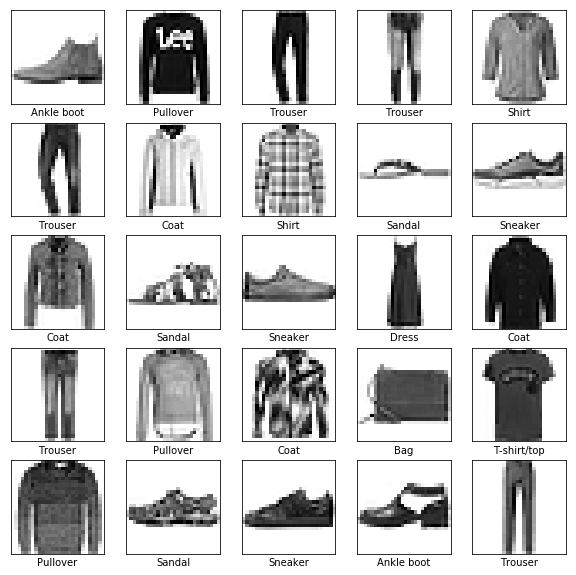

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(XTest[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[YTest[i]])
plt.show()

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
XPCATransformed = pca.fit_transform(XTrain)
df_pca=pd.DataFrame(XPCATransformed, columns=["x", "y"])
df_pca["label"]=np.array(list(map(lambda x: class_names[x], YTrain)))
df_pca.head()

,x,y,label
0,-1022.143011,-359.702558,Shirt
1,1324.460491,-148.762310,Coat
2,352.880351,-1563.510430,Trouser
3,-369.232799,468.372325,Bag
4,1013.306962,-1443.415338,Dress


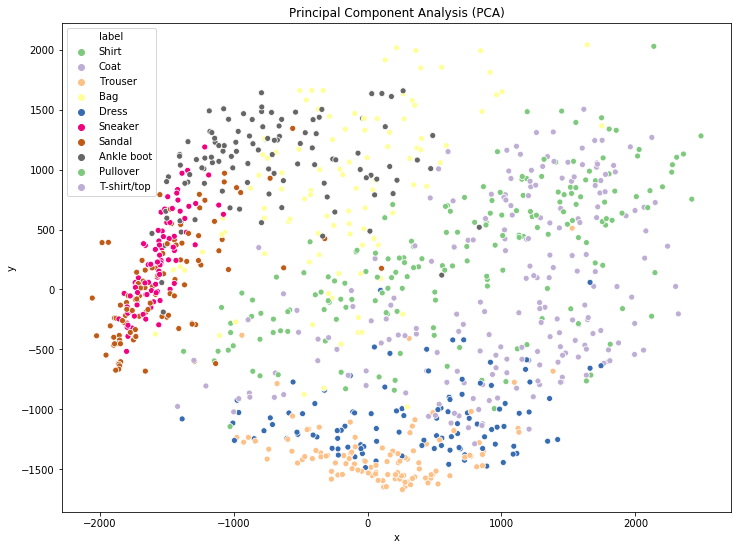

In [0]:
plt.figure(figsize=(12,9))
ax=sns.scatterplot(data=df_pca, x="x", y="y", hue="label", palette="Accent")
ax=ax.set_title("Principal Component Analysis (PCA)")

In [0]:
from sklearn.manifold import TSNE
TSNEModel = TSNE(n_components=2)
XTSNETransformed = TSNEModel.fit_transform(XTrain)
df_tsne=pd.DataFrame(XTSNETransformed, columns=["x", "y"])
df_tsne["label"]=np.array(list(map(lambda x: class_names[x], YTrain)))
df_tsne.head()

,x,y,label
0,-3.423997,-0.103752,Shirt
1,-16.596386,-23.317575,Coat
2,-20.710825,23.133324,Trouser
3,9.423706,-10.465933,Bag
4,-33.661205,5.452086,Dress


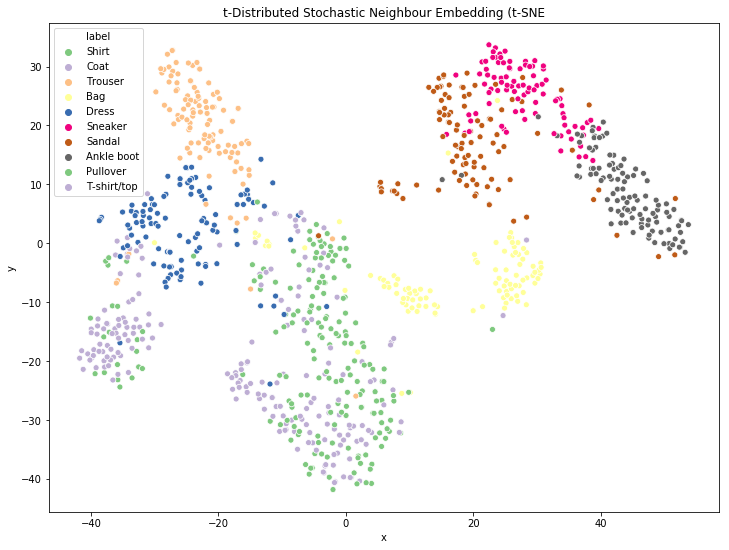

In [0]:
plt.figure(figsize=(12,9))
ax=sns.scatterplot(data=df_tsne, x="x", y="y", hue="label", palette="Accent")
ax=ax.set_title("t-Distributed Stochastic Neighbour Embedding (t-SNE")

Is it the same categories that the two methods fail to separate?

Do think that there are cases where PCA would be preferable to t-SNE?
